# Exploratory Computing with Python

## Statistics Notebook 4: More visualization and hypothesis testing

In this notebook we will visualize the dataset further and do some hypothesis testing

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from IPython.core.display import Image

import numpy as np
#import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#import mpld3
#mpld3.enable_notebook()

def axvline(val, **kwargs):
    ax = plt.gca()
    ylim = ax.get_ylim()
    return plt.plot([val, val], ylim, **kwargs)

plt.axvline = axvline

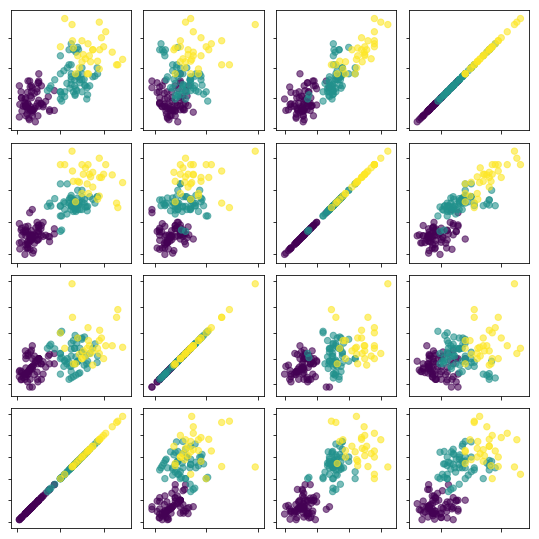

In [2]:
from mpld3 import plugins, utils

import pandas as pd
data = pd.read_table('../data/verified_pb.data', names=['gender', 'speaker', 'pid', 'phoneme', 'F0', 'F1', 'F2', 'F3'])

selector = data.pid == 1
X = data.loc[selector, ['F0', 'F1', 'F2', 'F3']].values
y = data.gender[selector].values

# dither the data for clearer plotting
X += 0.1 * np.random.random(X.shape)

fig, ax = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

for i in range(4):
    for j in range(4):
        points = ax[3 - i, j].scatter(X[:, j], X[:, i],
                                      c=y, s=40, alpha=0.6)

        # remove tick labels
for axi in ax.flat:
    for axis in [axi.xaxis, axi.yaxis]:
        axis.set_major_formatter(plt.NullFormatter())

# Here we connect the linked brush plugin
plugins.connect(fig, plugins.LinkedBrush(points))
plugins.connect(fig, plugins.MousePosition(fontsize=14));

### Exercise 1. <a name="back1"></a>Select and display subsets of data.

Based on the above example, now display the different acoustic properties by color for male speakers or the properties of speaker number 1.

<a href="#ex1answer">Answers to Exercise 1</a>

### Correlations

- mostly descriptive statistics 
- very often we want to know the relationship between two variables

    e.g. how are college grades related to aptitude test scores?

***Correlation:*** A statistical technique for determining the degree to which two variables are related or covary.

Pearson Product Moment Correlation ($r$)

In [3]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("anscombe")
for i in np.unique(df.dataset):
    print('Dataset %s r=%.2f' % (i, np.corrcoef(df[df.dataset==i].x, df[df.dataset==i].y)[0, 1]))

Dataset I r=0.82
Dataset II r=0.82
Dataset III r=0.82
Dataset IV r=0.82


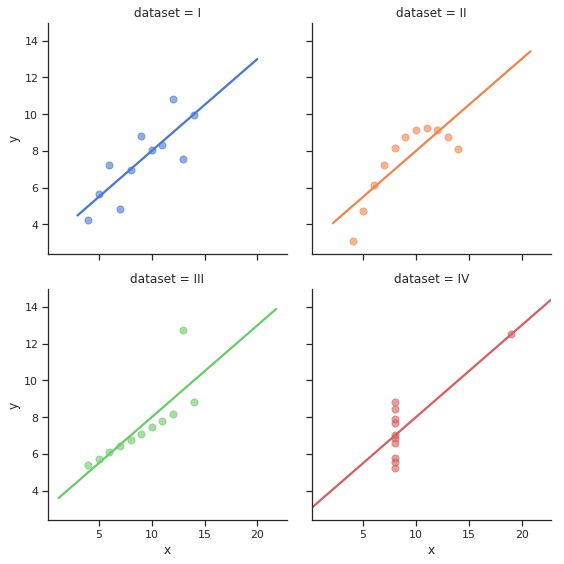

In [4]:
ph = sns.lmplot("x", "y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.6})

In [5]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/500px-Correlation_examples2.svg.png',
      width=1000)

### Exercise 2: <a name="back2"></a>Find the relations between the acoustic measures.

Determine the correlation coefficient between F0, F1, F2, and F3 for a given vowel and gender. Display the marginal distributions of the relations with the highest correlations.

<a href="#ex2answer">Answers to Exercise 2</a>

### Exercise 3: <a name="back3"></a>How well can we predict the fundamental frequency given the formants?

Create a model that tries to estimate fundamental frequency from formants.

<a href="#ex3answer">Answers to Exercise 3</a>

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

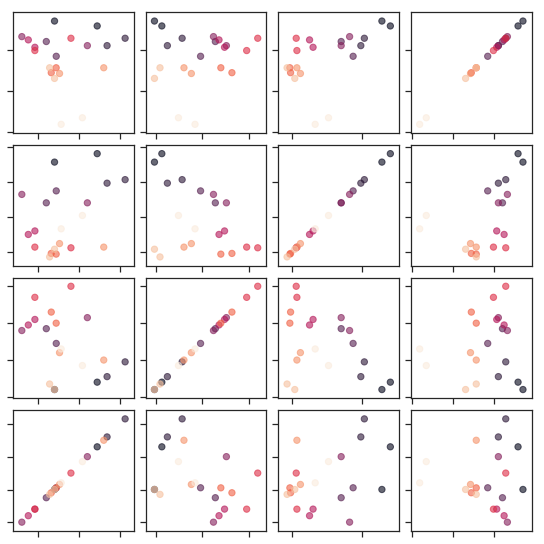

In [6]:
from mpld3 import plugins, utils

import pandas as pd
data = pd.read_table('../data/verified_pb.data', names=['gender', 'speaker', 'pid', 'phoneme', 'F0', 'F1', 'F2', 'F3'])

selector = data.gender == 1 
selector = data.speaker == 1
X = data.loc[selector, ['F0', 'F1', 'F2', 'F3']].values
y = data.pid[selector].values

# dither the data for clearer plotting
X += 0.1 * np.random.random(X.shape)

fig, ax = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

for i in range(4):
    for j in range(4):
        points = ax[3 - i, j].scatter(X[:, j], X[:, i],
                                      c=y, s=40, alpha=0.6)

# remove tick labels
for axi in ax.flat:
    for axis in [axi.xaxis, axi.yaxis]:
        axis.set_major_formatter(plt.NullFormatter())

# Here we connect the linked brush plugin
plugins.connect(fig, plugins.LinkedBrush(points))
plugins.connect(fig, plugins.MousePosition(fontsize=14))

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


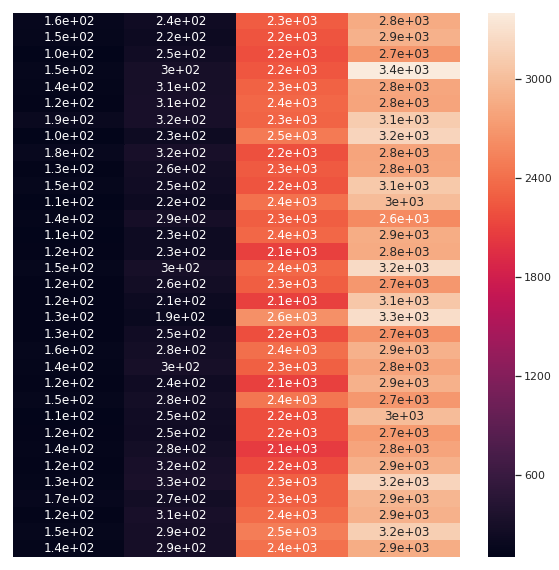

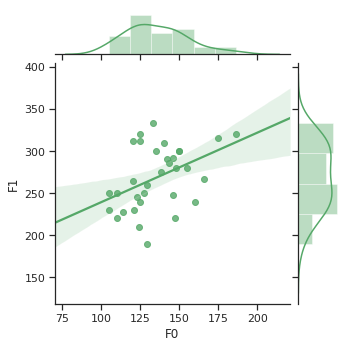

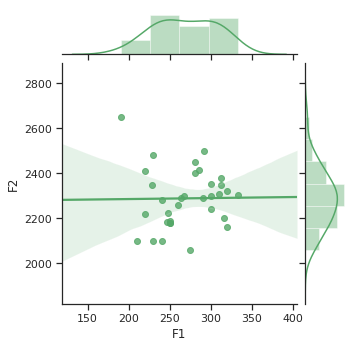

In [7]:
data_subset = data[data.gender == 1][data.pid == 1][::2].loc[:, ['F0', 'F1', 'F2', 'F3']]
plt.figure(figsize=(10, 10))
ax = sns.heatmap(data_subset, annot=True)
# ax = sns.heatmap(data_subset, mask=data_subset > 2000, cbar=False,
#                 annot=True, annot_kws={"weight": "bold"})
ax.set_xticks([])
ax.set_yticks([])
#plt.figure()
color = sns.color_palette()[2]
g = sns.jointplot("F0", "F1", data=data_subset, kind="reg",
                  color=color, height=5)
g = sns.jointplot("F1", "F2", data=data_subset, kind="reg",
                  color=color, height=5)

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [8]:
import statsmodels.api as sm
from patsy import dmatrices
data2 = data[::2]
data2.gender = data.gender.apply(lambda x : ['M', 'F', 'C'][x - 1])
data2.pid = data.pid.apply(lambda x : ['i', 'I', 'e', 'ae', '^', 'a', 'o', 'U', 'u', '3'][x - 1])
data2.speaker = data.speaker.apply(lambda x : 'S%02d' % x)
print(data2.head())
y, X = dmatrices('F0 ~ F1 + F2 + F3', data=data2, return_type='dataframe')
mod = sm.OLS(y, X) 
res = mod.fit() 
print(res.summary())

  gender speaker pid phoneme     F0     F1      F2      F3
0      M     S01   i      IY  160.0  240.0  2280.0  2850.0
2      M     S01   I      IH  203.0  390.0  2030.0  2640.0
4      M     S01   e      EH  161.0  490.0  1870.0  2420.0
6      M     S01  ae     *AE  140.0  560.0  1820.0  2660.0
8      M     S01   ^      AH  144.0  590.0  1250.0  2620.0
                            OLS Regression Results                            
Dep. Variable:                     F0   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     140.6
Date:                Fri, 31 Aug 2018   Prob (F-statistic):           2.12e-72
Time:                        03:47:13   Log-Likelihood:                -4029.7
No. Observations:                 760   AIC:                             8067.
Df Residuals:                     756   BIC:                             8086.
Df Model:     

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>